## 案例概述

任务描述：随着电信行业的不断发展，运营商们越来越重视如何扩大其客户群体。据研究，获取新客户所需的成本远高于保留现有客户的成本，因此为了满足在激烈竞争中的优势，保留现有客户成为一大挑战。对电信行业而言，可以通过数据挖掘等方式来分析可能影响客户决策的各种因素，以预测他们是否会产生流失（停用服务、转投其他运营商等）。   
数据集：本案例所使用数据集来自Kaggle平台，数据集一共提供了7043条用户样本，每条样本包含21列属性，由多个维度的客户信息以及用户是否最终流失的标签组成，客户信息具体如下：
基本信息：包括性别、年龄、经济情况、入网时间等；
开通业务信息：包括是否开通电话业务、互联网业务、网络电视业务、技术支持业务等；
签署的合约信息：包括合同年限、付款方式、每月费用、总费用等。

方法概述：电信用户流失预测中，运营商最为关心的是客户的召回率，即在真正流失的样本中，我们预测到多少条样本。其策略是宁可把未流失的客户预测为流失客户而进行多余的留客行为，也不漏掉任何一名真正流失的客户。预测的主要步骤主要有：数据预处理、可视化分析、特征工程、模型预测、模型评估、分析与决策。



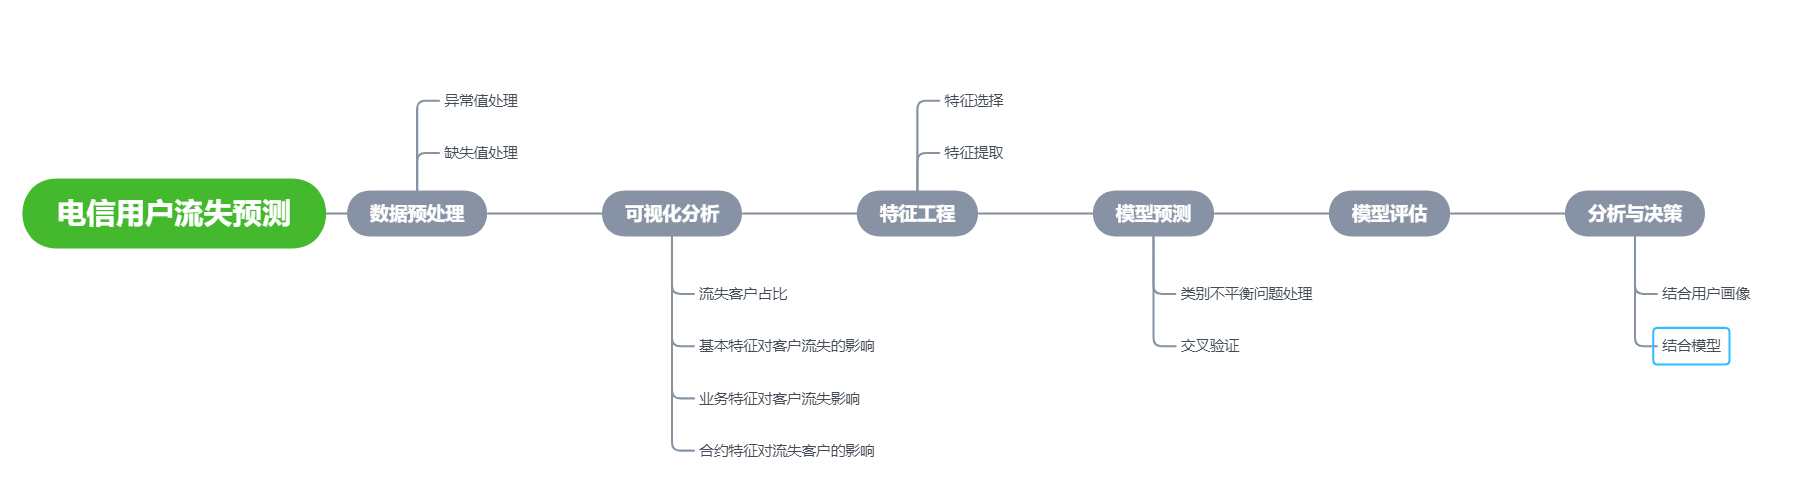

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #  忽略弹出的warnings信息

data = pd.read_csv('../data/Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)    # 显示所有列
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


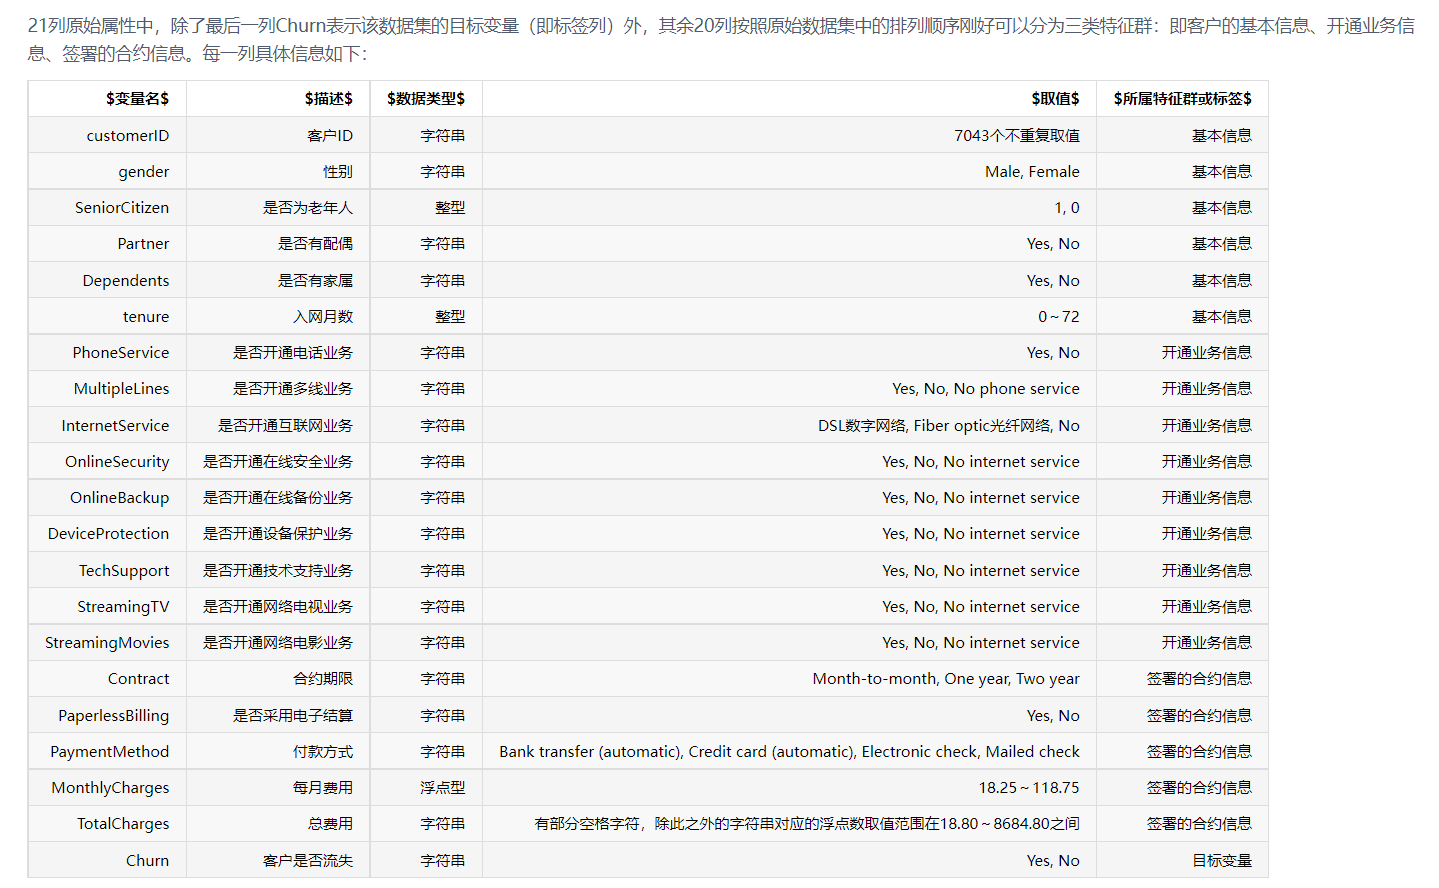

In [3]:
# 首先查看数据集中是否有重复值。
dupNum = data.shape[0] - data.drop_duplicates().shape[0]
print("数据集中有%s列重复值" % dupNum)

数据集中有0列重复值


In [4]:
# 统计数据集中缺失值情况：
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

统计结果告诉我们数据集中应该役有缺失值，但是可能存在这样的情况:采用"'Nall、NaN、"等字符(串)表示缺铁失。数据集中就有这样一列TotlCharges特征，存在如下所示的11条样本，其特征值为空格字符（'')∶


In [5]:
# 查看TotalCharges的缺失值
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


对TotalCharges这列原本为字符串类型的特征，由于其特征值含有数值意义，应该首先将其特征值转换为数值形式(浮点数)。此外，对其中不可转换的空格字符，可以用convert_objects()函数转换成标准的数值型缺失值NaN。


In [6]:
#  convert_numeric如果为True，则尝试强制转换为数字，不可转换的变为NaN
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce') 

print("此时TotalCharges是否已经转换为浮点型：", data['TotalCharges'].dtype == 'float')
print("此时TotalCharges存在%s行缺失样本。" % data['TotalCharges'].isnull().sum())

此时TotalCharges是否已经转换为浮点型： True
此时TotalCharges存在11行缺失样本。


传统方法较常采用固定值来进行数值型特征的缺失值填充，例如本案例中可以尝试采用0进行填充。


In [7]:
# 固定值填充
fnDf = data['TotalCharges'].fillna(0).to_frame()

print("如果采用固定值填充方法还存在%s行缺失样本。" % fnDf['TotalCharges'].isnull().sum())

如果采用固定值填充方法还存在0行缺失样本。


In [8]:
# 更进一步的，可以发现缺失样本中tenure特征（表示客户的入网时间）均为0，且在整个数据集中tenure为0与TotalCharges为缺失值是一一对应的。结合实际业务分析，这些样本对应的客户可能入网当月就流失了，但仍然要收取当月的费用，因此总费用即为该用户的每月费用（MonthlyCharges）。因此本案例最终采用MonthlyCharges的数值对TotalCharges进行填充。
# 用MonthlyCharges的数值填充TotalCharges的缺失值
data['TotalCharges'] = data['TotalCharges'].fillna(data['MonthlyCharges'])    

data[data['tenure'] == 0][['MonthlyCharges', 'TotalCharges']]    # 观察处理后缺失值变化情况

,MonthlyCharges,TotalCharges
488,52.55,52.55
753,20.25,20.25
936,80.85,80.85
1082,25.75,25.75
1340,56.05,56.05
3331,19.85,19.85
3826,25.35,25.35
4380,20.00,20.00
5218,19.70,19.70
6670,73.35,73.35


## 异常值处理

In [9]:
# 查看数值类特征的统计信息：
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


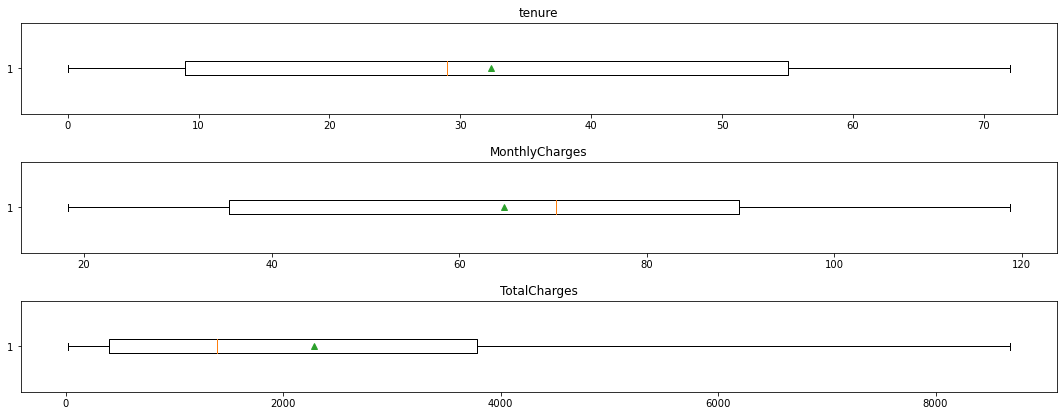

In [10]:
# 数据集中大部分为类别型特征，上表中的SeniorCitizen特征取值只有0和1，
# 也可视为类别特征。因此只有tenure、MonthlyCharges及
# 经过处理的TotalCharges是数值特征，继续结合箱型图进行分析：

# 箱型图观察异常值情况
import seaborn as sns
import matplotlib.pyplot as plt    # 可视化
# 在Jupyter notebook里嵌入图片
%matplotlib inline

# 分析百分比特征
fig = plt.figure(figsize=(15,6)) # 建立图像

# tenure特征
ax1 = fig.add_subplot(311)    # 子图1
list1 = list(data['tenure'])
ax1.boxplot(list1, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax1.set_title('tenure')

# MonthlyCharges特征
ax2 = fig.add_subplot(312)    # 子图2
list2 = list(data['MonthlyCharges'])
ax2.boxplot(list2, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax2.set_title('MonthlyCharges')

# TotalCharges
ax3 = fig.add_subplot(313)    # 子图3
list3 = list(data['TotalCharges'])
ax3.boxplot(list3, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax3.set_title('TotalCharges')

plt.tight_layout(pad=1.5)    # 设置子图之间的间距
plt.show() # 展示箱型图

## 可视化分析

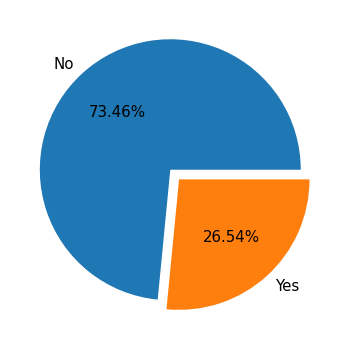

In [11]:
# 流失客户占比

# 观察是否存在类别不平衡现象
p = data['Churn'].value_counts()    # 目标变量正负样本的分布

plt.figure(figsize=(10,6))    # 构建图像

# 绘制饼图并调整字体大小
patches, l_text, p_text = plt.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
# l_text是饼图对着文字大小，p_text是饼图内文字大小
for t in p_text:
    t.set_size(15)
for t in l_text:
    t.set_size(15)
    
plt.show()    # 展示图像

由饼状图可见流失用户占比为26.54%，存在类别不平衡现象，后续需要进行相应处理。


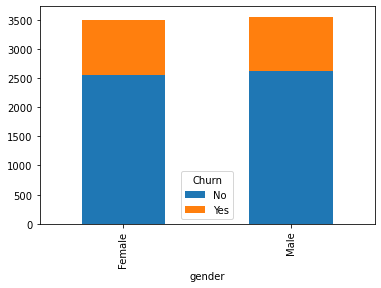

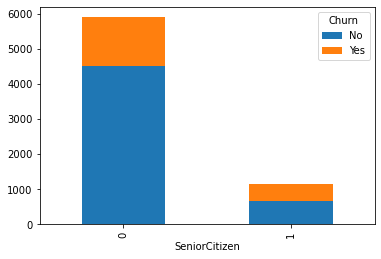

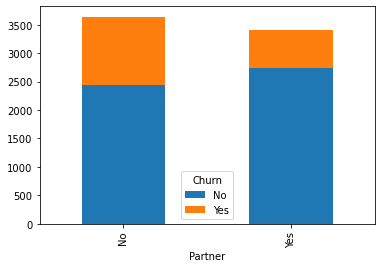

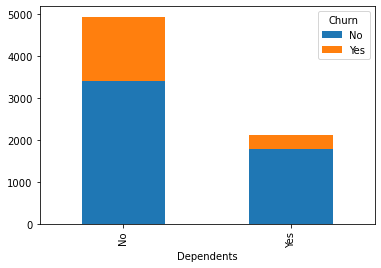

In [12]:
# 基本特征对客户流失影响


### 性别、是否老年人、是否有配偶、是否有家属等特征对客户流失的影响
baseCols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for i in baseCols:
    cnt = pd.crosstab(data[i], data['Churn'])    # 构建特征与目标变量的列联表
    cnt.plot.bar(stacked=True)    # 绘制堆叠条形图，便于观察不同特征值流失的占比情况
    plt.show()    # 展示图像

由图可知:性别对客户流失基本没有影响;年龄对客户流失有影响，老年人流失占比高于年轻人;是否有配偶对客户流失有影响，无配偶客户流失占比高于有配偶客户，是否有家属对客户流失有影响，无家属客户流失占比高于有家属客户。


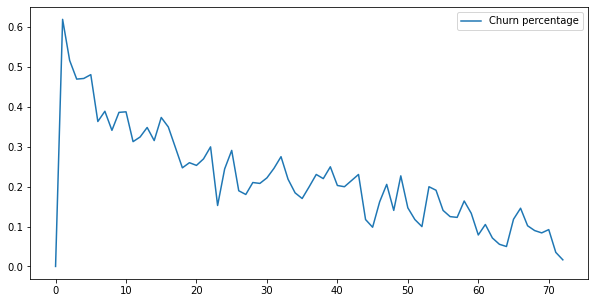

In [13]:
### 观察流失率与入网月数的关系
# 折线图
groupDf = data[['tenure', 'Churn']]    # 只需要用到两列数据
groupDf['Churn'] = groupDf['Churn'].map({'Yes': 1, 'No': 0})    # 将正负样本目标变量改为1和0方便计算
pctDf = groupDf.groupby(['tenure']).sum() / groupDf.groupby(['tenure']).count()    # 计算不同入网月数对应的流失率
pctDf = pctDf.reset_index()    # 将索引变成列

plt.figure(figsize=(10, 5))
plt.plot(pctDf['tenure'], pctDf['Churn'], label='Churn percentage')    # 绘制折线图
plt.legend()    # 显示图例
plt.show()

In [14]:
pctDf.head()

,tenure,Churn
0,0,0.000000
1,1,0.619902
2,2,0.516807
3,3,0.470000
4,4,0.471591


由图可知:除了刚入网(tenure=0)的客户之外，流失率随着入网时间的延长呈下降趋势;当入网超过两个月时，流失率小于留存率，这段时间可以看做客户的适应期。


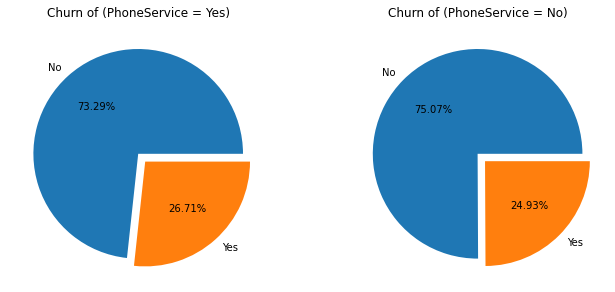

In [15]:
# 业务特征对客户流失影响

# 电话业务
posDf = data[data['PhoneService'] == 'Yes']
negDf = data[data['PhoneService'] == 'No']

fig = plt.figure(figsize=(10,4)) # 建立图像

ax1 = fig.add_subplot(121)
p1 = posDf['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (PhoneService = Yes)')

ax2 = fig.add_subplot(122)
p2 = negDf['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (PhoneService = No)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

由图可知，是否开通电话业务对客户流失影响很小。


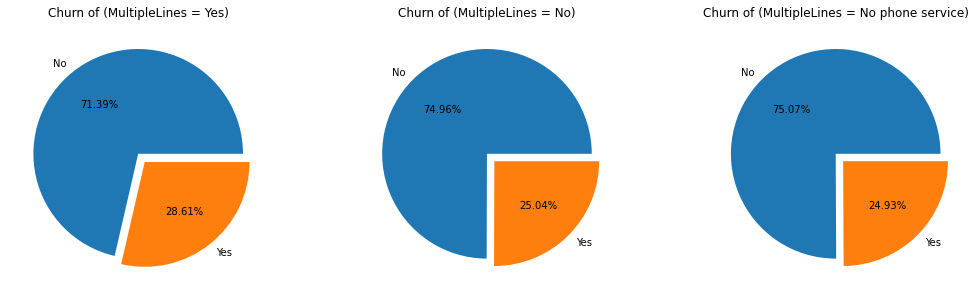

In [16]:
# 多线业务
df1 = data[data['MultipleLines'] == 'Yes']
df2 = data[data['MultipleLines'] == 'No']
df3 = data[data['MultipleLines'] == 'No phone service']

fig = plt.figure(figsize=(15,4)) # 建立图像

ax1 = fig.add_subplot(131)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (MultipleLines = Yes)')

ax2 = fig.add_subplot(132)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (MultipleLines = No)')

ax3 = fig.add_subplot(133)
p3 = df3['Churn'].value_counts()
ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax3.set_title('Churn of (MultipleLines = No phone service)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

由图可知，是否开通多线业务对客户流失影响很小。此外MultiplelLines取值为'No和"No phone service'的两种情况基本一致，后续可以合并在一起。


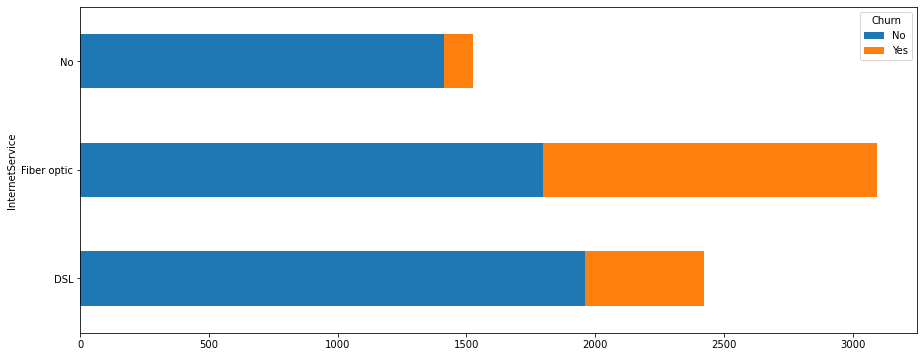

In [17]:
# 互联网业务
cnt = pd.crosstab(data['InternetService'], data['Churn'])    # 构建特征与目标变量的列联表
cnt.plot.barh(stacked=True, figsize=(15,6))    # 绘制堆叠条形图，便于观察不同特征值流失的占比情况
plt.show()    # 展示图像

由图可知，未开通互联网的客户总数最少，而流失比例最低(7.40%);开通光纤网络的客户总数最多，流失比例也最高
(41.89%) ;开通数字网络的客户则均居中(18.96%)。可
以推测应该有更深层次的因素导致光纤用户流失更多客户，下一步观察与互联网相关的各项业务。


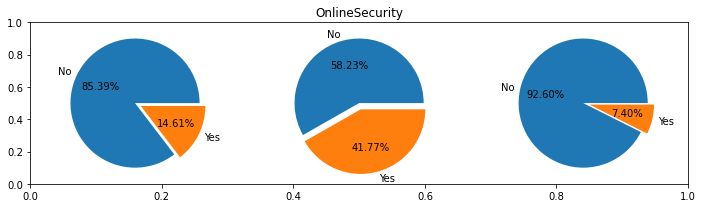

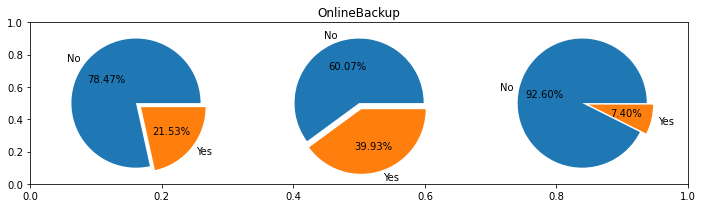

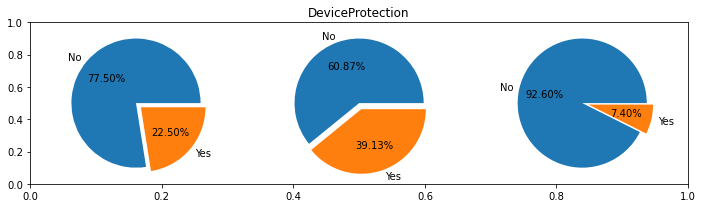

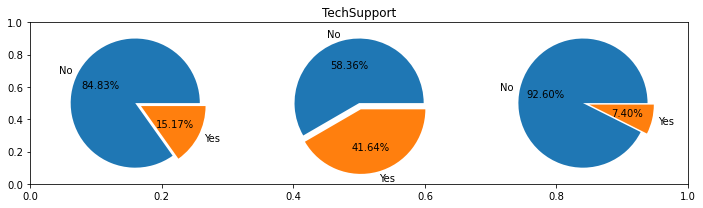

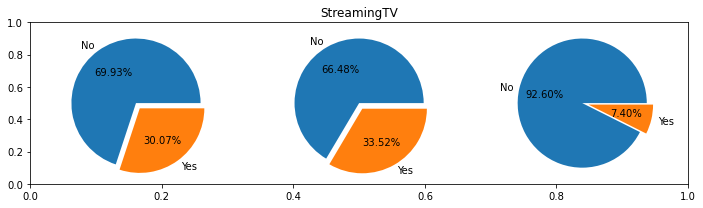

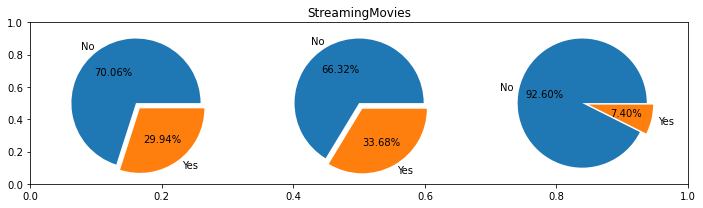

In [18]:
# 与互联网相关的业务
internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in internetCols:
    df1 = data[data[i] == 'Yes']
    df2 = data[data[i] == 'No']
    df3 = data[data[i] == 'No internet service']

    fig = plt.figure(figsize=(10,3)) # 建立图像
    plt.title(i)
    
    ax1 = fig.add_subplot(131)
    p1 = df1['Churn'].value_counts()
    ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    # 开通业务

    ax2 = fig.add_subplot(132)
    p2 = df2['Churn'].value_counts()
    ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    # 未开通业务

    ax3 = fig.add_subplot(133)
    p3 = df3['Churn'].value_counts()
    ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    # 未开通互联网业务
  
    plt.tight_layout()    # 设置子图之间的间距
    plt.show() # 展示饼状图

由图可知:所有互联网相关业务中未开通互联网的客户流失率均为7.40%，可以判断原因是上述六列特征均只在客户开通互联网业务之后才有实际意义，因而不会影响未开通互联网的客户;开通了这些新业务之后，用户的流失率会有不同程度的降低，可以认为多绑定业务有助于用户的留存;‘StreamingTⅣV和'StreamingMovies两列特征对客户流失基本没有影响。此外，由于"'No internet service'也算是'No'的一种情况，因此后续步骤中可以考虑将两种特征值进行合并。


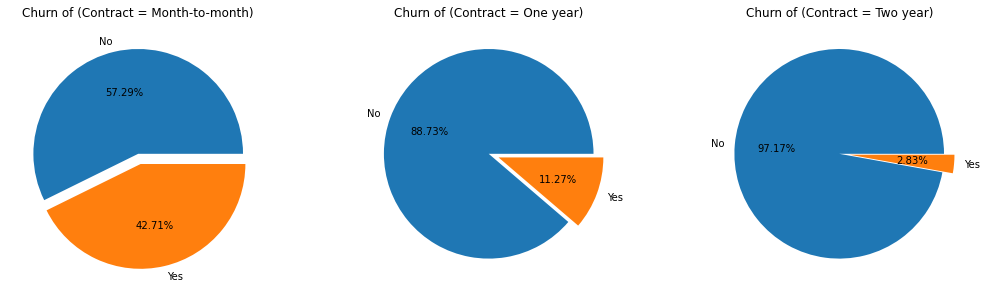

In [19]:
# 合约特征对客户流失影响

# 合约期限
df1 = data[data['Contract'] == 'Month-to-month']
df2 = data[data['Contract'] == 'One year']
df3 = data[data['Contract'] == 'Two year']

fig = plt.figure(figsize=(15,4)) # 建立图像

ax1 = fig.add_subplot(131)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (Contract = Month-to-month)')

ax2 = fig.add_subplot(132)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (Contract = One year)')

ax3 = fig.add_subplot(133)
p3 = df3['Churn'].value_counts()
ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax3.set_title('Churn of (Contract = Two year)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

由图可知:合约期那限越长，用户的流失率越低。


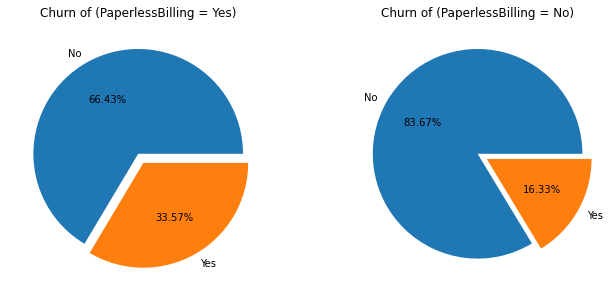

In [20]:
# 是否采用电子结算
df1 = data[data['PaperlessBilling'] == 'Yes']
df2 = data[data['PaperlessBilling'] == 'No']

fig = plt.figure(figsize=(10,4)) # 建立图像

ax1 = fig.add_subplot(121)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (PaperlessBilling = Yes)')

ax2 = fig.add_subplot(122)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (PaperlessBilling = No)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

由图可知:采用电子结算的客户流失率较高，原因可能是电子结算多为按月支付的形式。


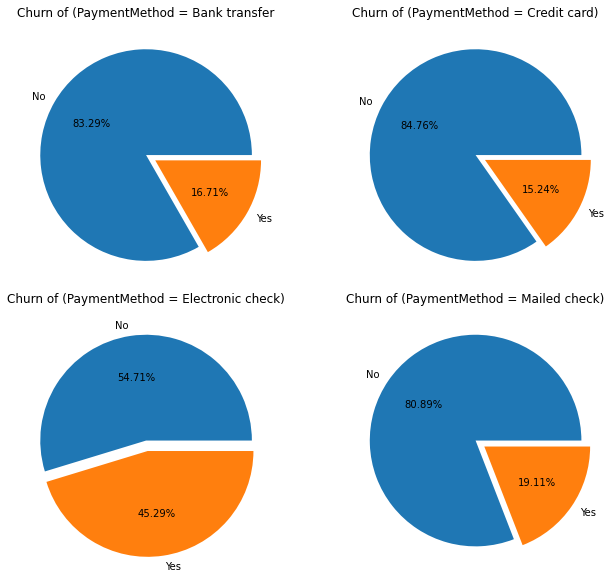

In [21]:
# 付款方式
df1 = data[data['PaymentMethod'] == 'Bank transfer (automatic)']    # 银行转账（自动）
df2 = data[data['PaymentMethod'] == 'Credit card (automatic)']    # 信用卡（自动）
df3 = data[data['PaymentMethod'] == 'Electronic check']    # 电子支票
df4 = data[data['PaymentMethod'] == 'Mailed check']    # 邮寄支票

fig = plt.figure(figsize=(10,8)) # 建立图像

ax1 = fig.add_subplot(221)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (PaymentMethod = Bank transfer')

ax2 = fig.add_subplot(222)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (PaymentMethod = Credit card)')

ax3 = fig.add_subplot(223)
p3 = df3['Churn'].value_counts()
ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax3.set_title('Churn of (PaymentMethod = Electronic check)')

ax4 = fig.add_subplot(224)
p4 = df4['Churn'].value_counts()
ax4.pie(p4,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax4.set_title('Churn of (PaymentMethod = Mailed check)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

由图可知:四种付款方式中采用电子支票的客户流失率远高于其他三种。


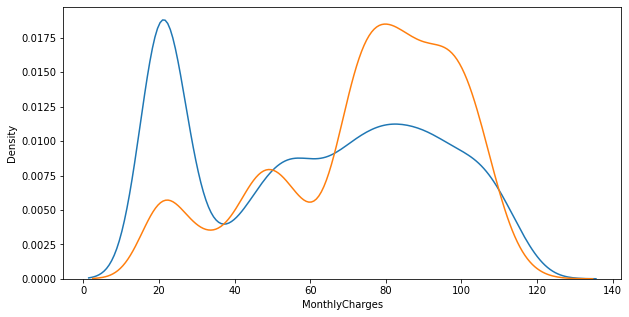

In [22]:
# 每月费用核密度估计图
plt.figure(figsize=(10, 5))    # 构建图像

negDf = data[data['Churn'] == 'No']
sns.distplot(negDf['MonthlyCharges'], hist=False, label= 'No')
posDf = data[data['Churn'] == 'Yes']
sns.distplot(posDf['MonthlyCharges'], hist=False, label= 'Yes')

plt.show()    # 展示图像

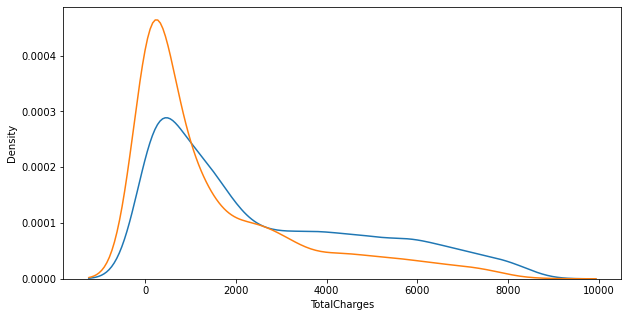

In [23]:
# 总费用核密度估计图
plt.figure(figsize=(10, 5))    # 构建图像

negDf = data[data['Churn'] == 'No']
sns.distplot(negDf['TotalCharges'], hist=False, label= 'No')
posDf = data[data['Churn'] == 'Yes']
sns.distplot(posDf['TotalCharges'], hist=False, label= 'Yes')

plt.show()    # 展示图像

由图可知:客户的流失率的基本趋势是随每月费用的增而增长，这与实际业务较为符合;当客户的总费用积累越多，流失率越低，这说明这些客户已经称为稳定的客户，不会轻易流失;此外，当每月费用处于70～110之间时流失率较高。


## 特征工程

In [24]:
# 特征提取

### 数值特征标准化
from sklearn.preprocessing import StandardScaler    # 导入标准化库

'''
注：

新版本的sklearn库要求输入数据是二维的，而例如data['tenure']这样的Series格式本质上是一维的
如果直接进行标准化，可能报错 "ValueError: Expected 2D array, got 1D array instead"
解决方法是变一维的Series为二维的DataFrame，即多加一组[]，例如data[['tenure']]
'''
scaler = StandardScaler()
data[['tenure']] = scaler.fit_transform(data[['tenure']])
data[['MonthlyCharges']] = scaler.fit_transform(data[['MonthlyCharges']])
data[['TotalCharges']] = scaler.fit_transform(data[['TotalCharges']])

data[['tenure', 'MonthlyCharges', 'TotalCharges']].head()    # 观察此时的数值特征

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992667
1,0.066327,-0.259629,-0.172198
2,-1.236724,-0.362660,-0.958122
3,0.514251,-0.746535,-0.193706
4,-1.236724,0.197365,-0.938930


将数值特征缩放到同一尺度下，避免对特征重要性产生误判。


In [25]:
### 类别特征编码
# 首先将部分特征值进行合并
data.loc[data['MultipleLines']=='No phone service', 'MultipleLines'] = 'No'

internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in internetCols:
    data.loc[data[i]=='No internet service', i] = 'No'

print("MultipleLines特征还有%d条样本的值为 'No phone service'" % data[data['MultipleLines']=='No phone service'].shape[0])
print("OnlineSecurity特征还有%d条样本的值为 'No internet service'" % data[data['OnlineSecurity']=='No internet service'].shape[0])

MultipleLines特征还有0条样本的值为 'No phone service'
OnlineSecurity特征还有0条样本的值为 'No internet service'


In [26]:
# 部分类别特征只有两类取值，可以直接用0、1代替；另外，可视化过程中发现有四列特征对结果影响可以忽略，后续直接删除
# 选择特征值为‘Yes’和 'No' 的列名
encodeCols = list(data.columns[3: 17].drop(['tenure', 'PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies', 'Contract']))     
for i in encodeCols:
    data[i] = data[i].map({'Yes': 1, 'No': 0})    # 用1代替'Yes’，0代替 'No'
# 顺便把目标变量也进行编码    
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [27]:
# 其他无序的类别特征采用独热编码    
onehotCols = ['InternetService', 'Contract', 'PaymentMethod']
churnDf = data['Churn'].to_frame()    # 取出目标变量列，以便后续进行合并
featureDf = data.drop(['Churn'], axis=1)    # 所有特征列

for i in onehotCols:
    onehotDf = pd.get_dummies(featureDf[i],prefix=i) 
    featureDf = pd.concat([featureDf, onehotDf],axis=1)    # 编码后特征拼接到去除目标变量的数据集中

data = pd.concat([featureDf, churnDf],axis=1)    # 拼回目标变量，确保目标变量在最后一列
data = data.drop(onehotCols, axis=1)    # 删除原特征列

### 特征选择
'customerID'特征的每个特征值都不同，因此对模型预测不起贡献，可以直接删除。 'gender'、'PhoneService'、'StreamingTV' 和 'StreamingMovies' 则在可视化环节中较为明显地观察到其对目标变量的影响较小，因此也删去这四列特征

In [28]:
# 删去无用特征 'customerID'、'gender'、 'PhoneService'、'StreamingTV'和'StreamingMovies'
data = data.drop(['customerID', 'gender', 'PhoneService', 'StreamingTV', 'StreamingMovies'], axis=1)

In [29]:
data.head(10)    # 观察此时的数据集

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,-1.277445,0,0,1,0,0,1,-1.160323,-0.992667,1,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0.066327,0,1,0,1,0,0,-0.259629,-0.172198,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,-1.236724,0,1,1,0,0,1,-0.362660,-0.958122,1,0,0,1,0,0,0,0,0,1,1
3,0,0,0,0.514251,0,1,0,1,1,0,-0.746535,-0.193706,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,-1.236724,0,0,0,0,0,1,0.197365,-0.938930,0,1,0,1,0,0,0,0,1,0,1
5,0,0,0,-0.992402,1,0,0,1,0,1,1.159546,-0.643836,0,1,0,1,0,0,0,0,1,0,1
6,0,0,1,-0.422317,1,0,1,0,0,1,0.808907,-0.145771,0,1,0,1,0,0,0,1,0,0,0
7,0,0,0,-0.910961,0,1,0,0,0,0,-1.163647,-0.872640,1,0,0,1,0,0,0,0,0,1,0
8,0,1,0,-0.177995,1,0,0,1,1,1,1.330711,0.338066,0,1,0,1,0,0,0,0,1,0,1
9,0,0,1,1.206498,0,1,1,0,0,0,-0.286218,0.533031,1,0,0,0,1,0,1,0,0,0,0


此外，还可以采用相关系数矩阵衡量连续型特征之间的相关性、用卡方检验衡量离散型特征与目标变量的相关关系等等，从而进行进一步的特征选择。例如，可以对数据集中的三列连续型数值特征'tenure,Monthlyharges' TotalCharges'计算相关系数，其中"TotalCharges'与其他两列特征的相关系数均大于0.6，即存在较强相关性，因此可以考虑出除该列，以避免特征冗余。


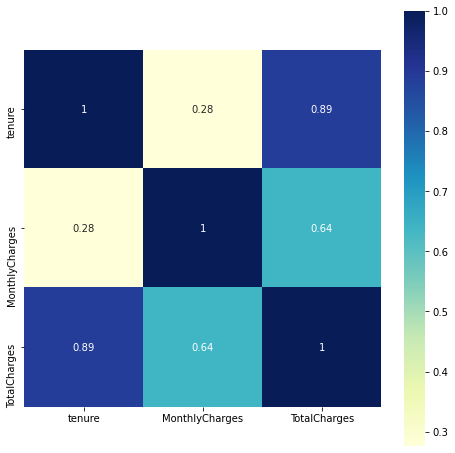

In [30]:
nu_fea = data[['tenure', 'MonthlyCharges', 'TotalCharges']]    # 选择连续型数值特征计算相关系数
nu_fea = list(nu_fea)    # 特征名列表
pearson_mat = data[nu_fea].corr(method='spearman')    # 计算皮尔逊相关系数矩阵

plt.figure(figsize=(8,8)) # 建立图像
sns.heatmap(pearson_mat, square=True, annot=True, cmap="YlGnBu")    # 用热度图表示相关系数矩阵
plt.show() # 展示热度图

In [31]:
data = data.drop(['TotalCharges'], axis=1)

data.head(10)    # 观察此时的数据集

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,-1.277445,0,0,1,0,0,1,-1.160323,1,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0.066327,0,1,0,1,0,0,-0.259629,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,-1.236724,0,1,1,0,0,1,-0.362660,1,0,0,1,0,0,0,0,0,1,1
3,0,0,0,0.514251,0,1,0,1,1,0,-0.746535,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,-1.236724,0,0,0,0,0,1,0.197365,0,1,0,1,0,0,0,0,1,0,1
5,0,0,0,-0.992402,1,0,0,1,0,1,1.159546,0,1,0,1,0,0,0,0,1,0,1
6,0,0,1,-0.422317,1,0,1,0,0,1,0.808907,0,1,0,1,0,0,0,1,0,0,0
7,0,0,0,-0.910961,0,1,0,0,0,0,-1.163647,1,0,0,1,0,0,0,0,0,1,0
8,0,1,0,-0.177995,1,0,0,1,1,1,1.330711,0,1,0,1,0,0,0,0,1,0,1
9,0,0,1,1.206498,0,1,1,0,0,0,-0.286218,1,0,0,0,1,0,1,0,0,0,0


## 模型预测

### 类别不平衡问题处理
在可视化环节中，我们观察到正负样本的比例大概在1:3左右，因此需要对正样本进行升采样或对负样本进行降采样。考虑到本数据集仅有7千多条样本，不适合采用降采样，进行升采样更为合理，本案例采用升采样中较为成熟的SMOTE方法生成更多的正样本

In [32]:
# SMOTE方法代码如下
import random
from sklearn.neighbors import NearestNeighbors    # k近邻算法

class Smote:
    def __init__(self,samples,N,k):
        self.n_samples,self.n_attrs=samples.shape
        self.N=N
        self.k=k
        self.samples=samples
        self.newindex=0


    def over_sampling(self):
        N=int(self.N)
        self.synthetic = np.zeros((self.n_samples * N, self.n_attrs))
        neighbors=NearestNeighbors(n_neighbors=self.k).fit(self.samples)    # 1.对每个少数类样本均求其在所有少数类样本中的k近邻
        for i in range(len(self.samples)):
            nnarray=neighbors.kneighbors(self.samples[i].reshape(1,-1),return_distance=False)[0]
            self._populate(N,i,nnarray)
        return self.synthetic

    # 2.为每个少数类样本选择k个最近邻中的N个；3.并生成N个合成样本
    def _populate(self,N,i,nnarray):
        for j in range(N):
            nn=random.randint(0,self.k-1)
            dif=self.samples[nnarray[nn]]-self.samples[i]
            gap=random.random()
            self.synthetic[self.newindex]=self.samples[i]+gap*dif
            self.newindex+=1

In [33]:
# 每个正样本用SMOTE方法随机生成两个新的样本
posDf = data[data['Churn'] == 1].drop(['Churn'], axis=1)    # 共1869条正样本, 取其所有特征列
posArray = posDf.values    # pd.DataFrame -> np.array, 以满足SMOTE方法的输入要求
newPosArray = Smote(posArray, 2, 5).over_sampling()
newPosDf = pd.DataFrame(newPosArray)    # np.array -> pd.DataFrame

newPosDf.head(10)    # 观察此时的新样本   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.000000,-1.235082,0.0,0.959668,1.0,0.0,0.0,1.0,-0.367955,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.000000,-1.236724,0.0,1.000000,1.0,0.0,0.0,1.0,-0.362660,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.000000,-1.236724,0.0,0.000000,0.0,0.0,0.0,1.0,0.197365,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-1.265609,0.0,0.000000,0.0,0.0,0.0,1.0,0.187935,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.000000,-0.876026,1.0,0.000000,0.0,1.0,0.0,1.0,1.194374,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.000000,-1.090454,1.0,0.000000,0.0,1.0,0.0,1.0,1.182221,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.622686,-0.101927,1.0,0.000000,0.0,1.0,1.0,1.0,1.318293,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.000000,-0.080863,1.0,0.000000,0.0,1.0,1.0,1.0,1.332296,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.000000,0.535070,1.0,0.000000,1.0,1.0,0.0,1.0,0.855853,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.677133,1.0,0.000000,1.0,1.0,0.0,1.0,1.294151,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
# 每个正样本用SMOTE方法随机生成两个新的样本
posDf = data[data['Churn'] == 1].drop(['Churn'], axis=1)    # 共1869条正样本, 取其所有特征列
posArray = posDf.values    # pd.DataFrame -> np.array, 以满足SMOTE方法的输入要求
newPosArray = Smote(posArray, 2, 5).over_sampling()
newPosDf = pd.DataFrame(newPosArray)    # np.array -> pd.DataFrame

newPosDf.head(10)    # 观察此时的新样本   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.00000,0.0,0.000000,-1.187324,0.0,0.595617,1.0,0.0,0.0,1.0,-0.400965,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.00000,0.0,0.000000,-1.233462,0.0,0.919888,1.0,0.0,0.0,1.0,-0.373178,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.00000,0.0,0.000000,-1.245640,0.0,0.000000,0.0,0.0,0.0,1.0,0.196638,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.00000,0.0,0.000000,-1.244682,0.0,0.000000,0.0,0.0,0.0,1.0,0.196716,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.00000,0.0,0.000000,-1.018828,1.0,0.000000,0.0,1.0,0.0,1.0,1.165154,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.00000,0.0,0.000000,-1.065442,1.0,0.000000,0.0,1.0,0.0,1.0,1.176437,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.00000,1.0,0.000000,-0.411482,1.0,0.000000,0.0,1.0,1.0,1.0,1.366103,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.00000,1.0,0.346374,-0.135681,1.0,0.000000,0.0,1.0,1.0,1.0,1.323804,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.75862,0.0,0.000000,0.460894,1.0,0.000000,1.0,1.0,0.0,1.0,1.320625,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.00000,0.0,0.000000,0.479459,1.0,0.000000,1.0,1.0,0.0,1.0,0.684282,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
print("原本的正样本有%d条" % posDf.shape[0])
print("原本的负样本有%d条" % (data.shape[0] - posDf.shape[0]))

原本的正样本有1869条
原本的负样本有5174条


In [36]:
# 为保证正负样本平衡，从新生成的样本中取出（5174 - 1869 = 3305）条样本，并加入原数据集进行shuffle操作。
# 构建类别平衡的数据集
from sklearn.utils import shuffle    

newPosDf = newPosDf[:3305]    # 直接选取前3305条样本
data = pd.concat([data, newPosDf])    # 竖向拼接
# data = shuffle(data).reset_index(drop=True)

print("此时数据集的规模为：", data.shape)

此时数据集的规模为： (10348, 43)


### 交叉验证
同样考虑到样本数较少的问题，本案例采用K折交叉验证的方式进行预测，提高数据利用率；此外，采用逻辑回归、SVM、随机森林、AdaBoost、XGBoost等算法构建模型，从中选择预测效果较好的模型进行最终的预测。

In [37]:
# K折交叉验证代码
# from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold

def kFold_cv(X, y, classifier, **kwargs):
    """
    :param X: 特征
    :param y: 目标变量
    :param classifier: 分类器
    :param **kwargs: 参数
    :return: 预测结果
    """
    kf = KFold(n_splits=5, shuffle=True) 
    y_pred = np.zeros(len(y))    # 初始化y_pred数组
    
    for train_index, test_index in kf.split(X):  
        X_train = X[train_index]    
        X_test = X[test_index]
        y_train = y[train_index]    # 划分数据集
        clf = classifier(**kwargs)    
        clf.fit(X_train, y_train)    # 模型训练
        y_pred[test_index] = clf.predict(X_test)    # 模型预测
    
    return y_pred 

In [ ]:
# 模型预测
from sklearn.linear_model import LogisticRegression as LR    # 逻辑回归
from sklearn.svm import SVC    # SVM
from sklearn.ensemble import RandomForestClassifier as RF    # 随机森林
from sklearn.ensemble import AdaBoostClassifier as Adaboost    # AdaBoost
from xgboost import XGBClassifier as XGB    # XGBoost

# X = data.iloc[:, :-1].as_matrix()
X = data.iloc[:, :-1].iloc[:,:].values # Kagging
y = data.iloc[:, -1].values

# 此处仅做演示，因此未进行调参过程
lr_pred = kFold_cv(X, y, LR)
svc_pred = kFold_cv(X, y, SVC)
rf_pred = kFold_cv(X, y, RF)
ada_pred = kFold_cv(X, y, Adaboost)
xgb_pred = kFold_cv(X, y, XGB)

## 模型评估

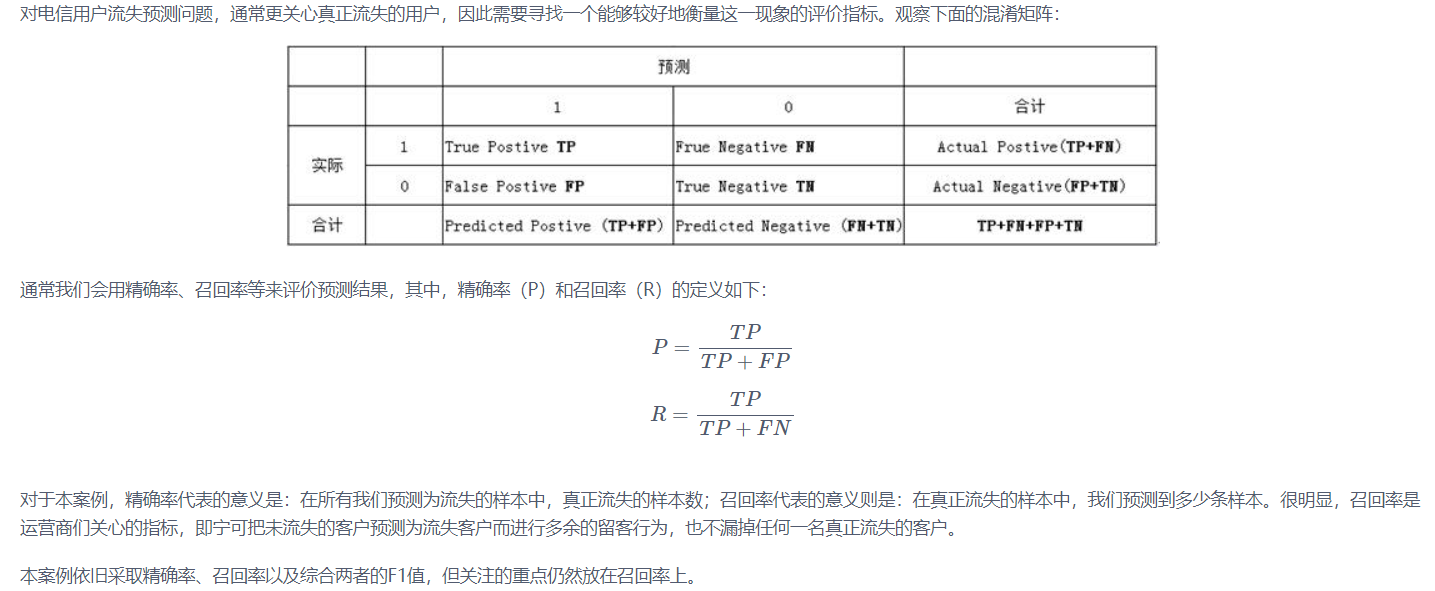

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score    # 导入精确率、召回率、F1值等评价指标

scoreDf = pd.DataFrame(columns=['LR', 'SVC', 'RandomForest', 'AdaBoost', 'XGBoost'])
pred = [lr_pred, svc_pred, rf_pred, ada_pred, xgb_pred]
for i in range(5):
    r = recall_score(y, pred[i])
    p = precision_score(y, pred[i])
    f1 = f1_score(y, pred[i])
    scoreDf.iloc[:, i] = pd.Series([r, p, f1])

scoreDf.index = ['Recall', 'Precision', 'F1-score']
scoreDf

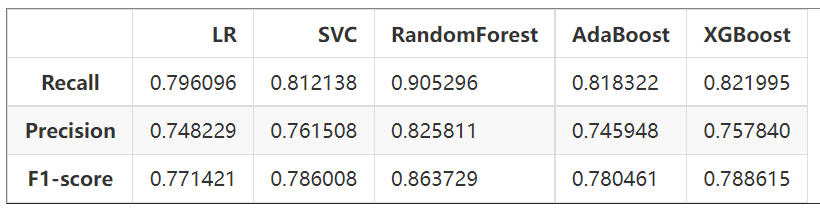

由表可知:五种模型中RandomForest的效果最好，可以用RandomForest单模型进行预则，也可以采用召回率最高的RandomForest和XGBost进行加权平均融合或Stacking融合。本案例选用RandomForest单模型进行演示，该算法还能同时输出特征重要性。


In [ ]:
# 特征重要性
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

kf = KFold(n_splits=5, shuffle=True, random_state=0)
y_pred = np.zeros(len(y))    # 初始化y_pred数组
clf = RF()

for train_index, test_index in kf.split(X):
    X_train = X[train_index]    
    X_test = X[test_index]
    y_train = y[train_index]    # 划分数据集
    clf.fit(X_train, y_train)    # 模型训练
    y_pred[test_index] = clf.predict(X_test)    # 模型预测
    
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = data.columns.drop(['Churn']),
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances    # 查看特征重要性

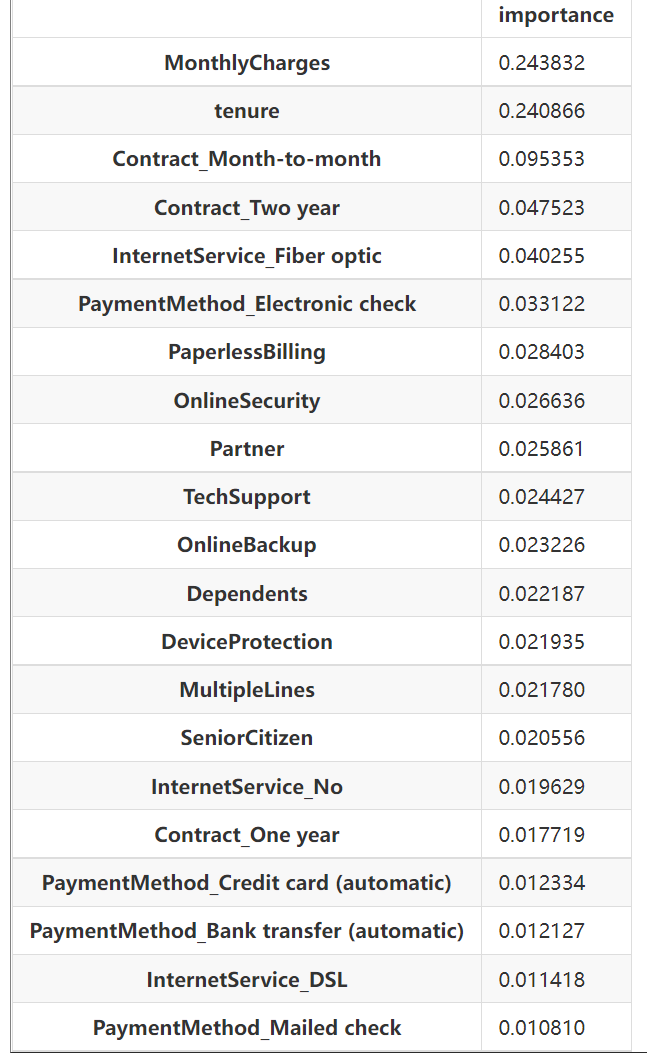

## 分析与决策

### 结合用户画像

在可视化阶段，可以发现较易流失的客户在各个特征的用户画像如下：

基本信息
老年人
未婚
无家属
入网时间不长，特别是2个月之内


开通业务
开通光纤网络
未开通在线安全、在线备份、设备保护、技术支持等互联网增值业务


签订合约
合约期限较短，特别是逐月付费客户最易流失
采用电子结算（多为按月支付）
采用电子支票
每月费用较高，特别是70～110之间
总费用较低（侧面反应入网时间较短）



根据用户画像，可以从各个方面推出相应活动以求留下可能流失的客户：

对老人推出亲情套餐等优惠
对未婚、无家属的客户推出暖心套餐等优惠
对新入网用户提供一定时期的优惠活动，直至客户到达稳定期
提高电话服务、光纤网络、网络电视、网络电影等的客户体验，尝试提高用户的留存率，避免客户流失
对能够帮助客户留存的在线安全、在线备份、设备保护、技术支持等互联网增值业务，加大宣传推广力度
对逐月付费用户推出年费优惠活动
对使用电子结算、电子支票的客户，推出其他支付方式的优惠活动
对每月费用在70～110之间推出一定的优惠活动
...

### 结合模型
在模型预测阶段，可以结合预测出的概率值决定对哪些客户进行重点留存：

In [40]:
# 预测客户流失的概率值
def prob_cv(X, y, classifier, **kwargs):
    """
    :param X: 特征
    :param y: 目标变量
    :param classifier: 分类器
    :param **kwargs: 参数
    :return: 预测结果
    """
    kf = KFold(n_splits=5, random_state=0)
    y_pred = np.zeros(len(y))    
    
    for train_index, test_index in kf.split(X):
        X_train = X[train_index]    
        X_test = X[test_index]
        y_train = y[train_index]    
        clf = classifier(**kwargs)    
        clf.fit(X_train, y_train)    
        y_pred[test_index] = clf.predict_proba(X_test)[:,1]    # 注：此处预测的是概率值
    
    return y_pred

In [ ]:
prob = prob_cv(X, y, RF)    # 预测概率值
prob = np.round(prob, 1)    # 对预测出的概率值保留一位小数，便于分组观察

# 合并预测值和真实值
probDf = pd.DataFrame(prob)
churnDf = pd.DataFrame(y)
df1 = pd.concat([probDf, churnDf], axis=1)
df1.columns = ['prob', 'churn']

df1 = df1[:7043]    # 只取原始数据集的7043条样本进行决策
df1.head(10)

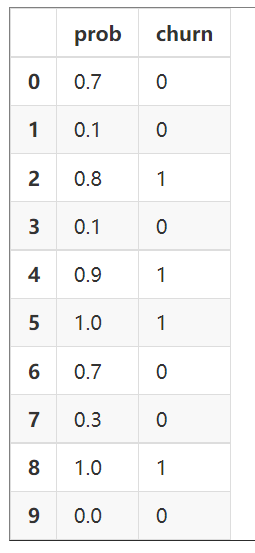

In [ ]:
# 分组计算每种预测概率值所对应的真实流失率
group = df1.groupby(['prob'])
cnt = group.count()    # 每种概率值对应的样本数
true_prob = group.sum() / group.count()    # 真实流失率
df2 = pd.concat([cnt,true_prob], axis=1).reset_index()
df2.columns = ['prob', 'cnt', 'true_prob']

df2

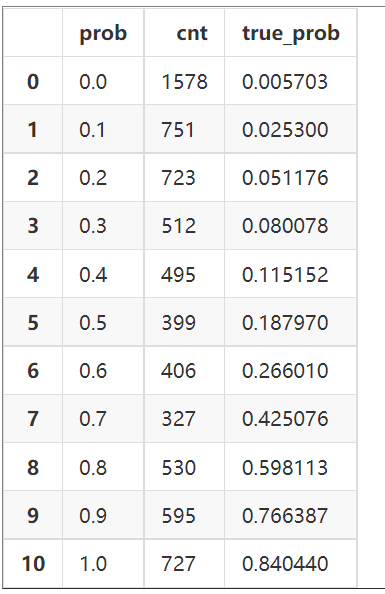

由表可知:预测流失率越大的客户中越有可能真正发生流失。对运营商而言，可以根据各预测棚率值分组的真实流失率设定阈值进行决策。例如，假设阈值为tue prob = 0.6，即优先关注真正流失为60%以上的群体，也就表示运营商可以对预测结果中大于等于0.9的客户进行重点留存。


## 优化思路
数据
数据预处理：对缺失值、异常值进行预处理
数据分析：用箱型图、饼图等
数据类别不平衡处理：SMOTE方法进行升采样


模型
模型评估：交叉验证方法
逻辑回归、SVM、随机森林、AdaBoost、XGBoost等